# 3 Layer FCNN with Stochastic Gradient Descent (SGD) Algorithm

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2

In [10]:
import tensorflow as tf
import numpy as np

### Reading data as image and storing it into training, validation and testing

In [186]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):

        if i != ".DS_Store":
            for j in os.listdir(train_path+"/"+i):
                tr_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                tr_out.append(i)

            for j in os.listdir(test_path+"/"+i):
                test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                test_out.append(i)

            for j in os.listdir(validation_path+"/"+i):
                val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
                val_out.append(i)
                
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

    return tr_data, test_data, val_data, tr_out, test_out, val_out



In [223]:
path = "/Users/rajeshr/Desktop/Assignment2/Group_22"
tr_data, test_data, val_data, tr_out, test_out, val_out = read_data(path)

# SGD

### Training

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               262656    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 512)               262656    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
11385/11385 [====================

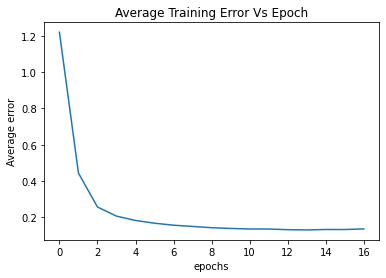

In [283]:
# Generating Three Layer FCNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

# Printing the architecture details of the model
model.summary()

#Setting the optimizer and compiling
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0,name='SGD')
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Setting the convergence criteria and fitting the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = model.fit(tr_data, tr_out, epochs=10000, batch_size=1, callbacks=callback)

#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Testing

In [284]:
loss, mse = model.evaluate(val_data, val_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9568


In [286]:
loss, mse = model.evaluate(test_data, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9563


In [285]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm

119/119 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 746,   0,   0,   0,   0,   0,   2,  10,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0, 730,   0,   0,   2,   2,  23],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,   0,  12,   0,   0, 721,   1,  20],
       [  0,   4,   0,   0,  10,   0,   0,   3, 734,   8],
       [  0,   3,   0,   0,  27,   0,   0,  19,  12, 698]], dtype=int32)>

# Batch Mode

### Training

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 512)               131584    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
15/15 [==========================

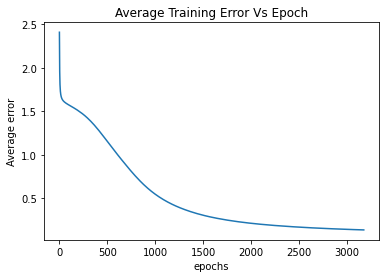

In [287]:
# Generating Three Layer FCNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

# Printing the architecture details of the model
model.summary()

#Setting the optimizer and compiling
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0,name='SGD')
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Setting the convergence criteria and fitting the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = model.fit(tr_data, tr_out, epochs=10000, batch_size=784, callbacks=callback)

#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Testing

In [288]:
loss, mse = model.evaluate(val_data, val_out)

119/119 [==============================] - 0s 997us/step - loss: 0.1824 - accuracy: 0.9418


In [289]:
loss, mse = model.evaluate(test_data, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9381


In [290]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm

119/119 [==============================] - 0s 935us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 742,   0,   0,   1,   0,   0,   5,  11,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0, 727,   0,   0,   2,   3,  25],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   0,   8,   0,   0, 707,   2,  36],
       [  0,  12,   0,   0,  10,   0,   0,   4, 722,  11],
       [  0,   2,   0,   0,  28,   0,   0,  47,  20, 662]], dtype=int32)>

# NAG

### Training

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 512)               131584    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
356/356 [========================

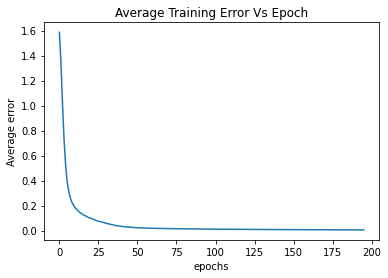

In [291]:
# Generating Three Layer FCNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

# Printing the architecture details of the model
model.summary()

#Setting the optimizer and compiling
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,name='SGD')
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Setting the convergence criteria and fitting the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = model.fit(tr_data, tr_out, epochs=10000, callbacks=callback)

#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Testing

In [292]:
loss, mse = model.evaluate(val_data, val_out)

119/119 [==============================] - 0s 963us/step - loss: 0.1180 - accuracy: 0.9692


In [293]:
loss, mse = model.evaluate(test_data, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9657


In [294]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm

119/119 [==============================] - 0s 922us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 749,   0,   0,   0,   0,   0,   1,   8,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0, 743,   0,   0,   1,   2,  12],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   9,   0,   0, 730,   2,  15],
       [  0,   6,   0,   0,   8,   0,   0,   4, 737,   4],
       [  0,   3,   0,   0,  18,   0,   0,  18,  14, 706]], dtype=int32)>

# RMSProp

### Training

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 512)               131584    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
356/356 [========================

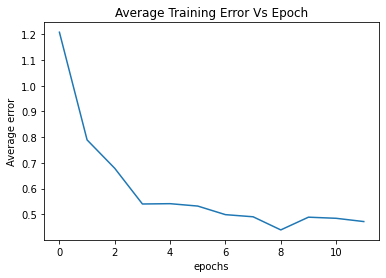

In [299]:
# Generating Three Layer FCNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

# Printing the architecture details of the model
model.summary()

#Setting the optimizer and compiling
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.99,
    momentum=0.9,
    epsilon=1e-08,
    centered=False,
    name='RMSprop')
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Setting the convergence criteria and fitting the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = model.fit(tr_data, tr_out, epochs=10000, callbacks=callback)

#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Testing

In [300]:
loss, mse = model.evaluate(val_data, val_out)

119/119 [==============================] - 0s 964us/step - loss: 0.4236 - accuracy: 0.8951


In [301]:
loss, mse = model.evaluate(test_data, test_out)

119/119 [==============================] - 0s 991us/step - loss: 0.4676 - accuracy: 0.8859


In [302]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm

119/119 [==============================] - 0s 886us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 753,   0,   0,   0,   0,   0,   1,   5,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  13,   0,   0, 640,   0,   0,   2,  26,  78],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  23,   0,   0,   2,   0,   0, 663,   9,  62],
       [  0,  43,   0,   0,   7,   0,   0,   4, 698,   7],
       [  0,  18,   0,   0,  40,   0,   0,  44,  49, 608]], dtype=int32)>

# Adam Optimizer

### Training

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               12900     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 128)               12928     
                                                                 
 Output_Layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 127,598
Trainable params: 127,598
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
356/356 [========================

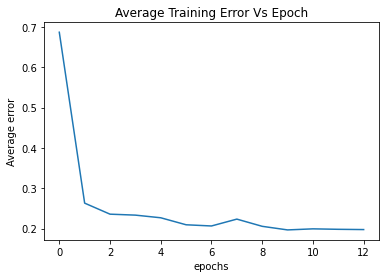

In [303]:
# Generating Three Layer FCNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(128, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(100, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(128, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

# Printing the architecture details of the model
model.summary()

#Setting the optimizer and compiling
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Setting the convergence criteria and fitting the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
trained = model.fit(tr_data, tr_out, epochs=10000, callbacks=callback)

#Plotting error vs epoch graph
plt.plot(trained.history['loss'])
plt.title("Average Training Error Vs Epoch")
plt.xlabel("epochs")
plt.ylabel("Average error")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

### Testing

In [304]:
loss, mse = model.evaluate(val_data, val_out)

119/119 [==============================] - 0s 420us/step - loss: 0.2053 - accuracy: 0.9291


In [305]:
loss, mse = model.evaluate(test_data, test_out)

119/119 [==============================] - 0s 480us/step - loss: 0.2148 - accuracy: 0.9312


In [306]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm

119/119 [==============================] - 0s 364us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 746,   0,   0,   0,   0,   0,   2,  11,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 677,   0,   0,  10,   4,  68],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   2,   0,   0, 730,   7,  18],
       [  0,   9,   0,   0,   6,   0,   0,   6, 690,  48],
       [  0,   1,   0,   0,  19,   0,   0,  38,  10, 691]], dtype=int32)>

### Confusion Matrix

In [162]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)

119/119 [==============================] - 0s 448us/step


In [163]:
p_class

array([9, 9, 9, ..., 4, 4, 4])

In [165]:
cm = tf.math.confusion_matrix(test_out, p_class)

In [166]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 750,   0,   0,   0,   0,   0,   2,   7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0, 733,   0,   0,   5,   3,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   0,   7,   0,   0, 734,   0,  12],
       [  0,   6,   0,   0,   6,   0,   0,   5, 732,  10],
       [  0,   5,   0,   0,  11,   0,   0,  21,  13, 709]], dtype=int32)>

In [ ]:
predictions = model.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
cm = tf.math.confusion_matrix(test_out, p_class)
cm